In [2]:
#checkout these libraries. I have a file that imports them when I startup my jupyter kernel
from matplotlib import pyplot as plt
import numpy  as np
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import random

# Variance
If you've ever taken a course in statistics you've probably heard the term variance or standard deviation. After expected value, the variance is probably the single most important statistic in data science. We're going to be talking about variance, since deviation is just the square root of variance.
## Formal Def of Variance
Formally it is calculated through the following equation:
$Var(X) = E(X^2)-E(X)^2 = \displaystyle\int_{-\infty}^{\infty} (x-\mu)^2f(x)dx \approx \frac{1}{n}\displaystyle\sum_{i}(x_i-\mu)^2 =\frac{1}{n^2}\displaystyle\sum_{i}\displaystyle\sum_{j}(x_i-x_j)^2 $

If you need to remember it, just remember "the expecation of the square minus the square of the expectation".

## Intuitive Definition of Variance
Intuitively variance can be thought of as how spread out the data is. Take a normal distribution. As we increase the variance more and more data occupies the tails

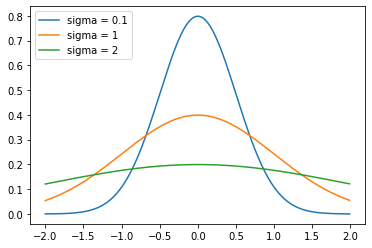

In [ ]:
mu = 0
x_axis = np.arange(-2,2,0.01)
sigma_small = 0.5
sigma_standard = 1
sigma_big = 2
#creates pdfs which are x,y pairs of points and their probabilities
sm_graph = stats.norm.pdf(x_axis,mu,sigma_small)
std_graph = stats.norm.pdf(x_axis,mu,sigma_standard)
big_graph =  stats.norm.pdf(x_axis,mu,sigma_big)

#Plots the pairs that were generated above
plt.plot(x_axis,sm_graph,label = "sigma = 0.1") # Blue graph, low variance
plt.plot(x_axis,std_graph, label = "sigma = 1") # Orange graph, standard variance
plt.plot(x_axis,big_graph, label = "sigma = 2") # green graph large variance

plt.legend(loc="upper left")
plt.show()

Notice that on wehn we have a small variance, all the data is concetrated in one location and as we increase the variance it spreads out? Our heuristic will be the following: The larger the variance, the more varied and thus unpredictable the data.

# Variance in Monte Carlo

In Monte-Carlo methods we always need to generate some randomness in order get our result. We sacrifice the extra computational power for algorithmic simplicity; however, this can yield to inconsistent results. To get more precision in our estimation there are two general techniques that we use. We've already explored the law of large numbers. As sample size increases, estimates tend to trend towards the true value. However, we can also modify our algorithm and engineer ways to reduce the variance. This means that we require less trials to get a satisfactorily precise result. 

*Note in this primer we will be introducing a new method to run the trials. Instead of incrementing a total, we will hold all the values in an array. This will still allow us to calculate the mean at the very end, but it will also allow us to do calculations of variance if we want.

# Simple Random Sample

So far in this class we have been using random sampling. When we use random.random() or random.int() all numbers within your specified range are equally likely. This is perfectly fine when all outcomes are equally probable or when you don't know much about the underlying distribution; however, if you undederstand your problem you can do a bit better. 

Let's take the example of an election. Let's say that you are trying to take a poll to see who will be elected mayor of a city. You post the poll online and let anyone answer. The problem is that you're leaving the polling data entirely up to chance. There is a chance that only a small subset of the population responds to your poll and does not represent the will of the actual population. This is why you might want to employ the techniques below.

# Stratified Sampling

Stratified sampling is when you divide your population into different strata or categories and take a random sample based on that. Let's say that you are trying to host a poll to see if a proposition on the upcoming ballot will pass. You are going to want to use a bit more outside information to inform your polling. Maybe there are 3 districts in the city. District A has 50% of the population, District B has 40% of the population and District C has 10% of the population. Additionally, the percentage of people expected to vote Yes on the propostion are in the table below. 

| District | Population   |  Percent Yes |
|------|------|------|
|   A  | 50%| 19% |
|   B  | 40%| 42% |
|   C  | 10%| 91% |

If that is the case, and you decide your sample size to be 50, a stratified sampling strategy would be to poll 25 people from district A, 20 people from district B and 5 people from district C. This can help reduce the variance in your model. In the example below we compare stratified sampling with simple random sampling.

In [5]:
#global variables for the distributions
dist_pops = {"A": 0.5, "B": 0.4, "C": 0.1}
yes_dist = {"A": 0.19, "B": 0.42, "C": 0.91}

def poll_simple(num_samples):
  #initialize the count outside of the loop
  yes_votes = 0
  for _ in range(num_samples):
    #random.choices(list,weights)
    #randomly chooses elements from a list weighted by a provided distribution
    rand_district = random.choices(list(dist_pops.keys()), weights=list(dist_pops.values()))[0]
    yes_votes += random.random() < yes_dist[rand_district]
  return yes_votes / num_samples

trials = 1000
samples = 10
value_list = [poll_simple(samples) for _ in range(trials)]
print(f"Estimated Vote Random Sample:\t{np.mean(value_list):.2f}")
print(f"Variance Random Sample: {np.var(value_list):.4f}")

def poll_stratified(num_samples):
  #initialize the count outside of the loop
  yes_votes = 0
  for district in dist_pops.keys():
    for _ in range(round(dist_pops[district] * num_samples)):
      yes_votes += random.random() < yes_dist[district]
  return yes_votes / num_samples

value_list = [poll_stratified(samples) for _ in range(trials)]
print(f"Estimated Vote Stratified:\t{np.mean(value_list):.2f}")
print(f"Variance Stratified: {np.var(value_list):.4f}")

Estimated Vote Random Sample:	0.36
Variance Random Sample: 0.0227
Estimated Vote Stratified:	0.36
Variance Stratified: 0.0181


Note how in random sampling, both the district aand the vote were random; however, in the stratified sample there were some fixed amounts. This greatly reduces the amount of randomness that we need to account for. Whenever you can, you should strive to write code that will give a more precise result.

# Antithetic Sampling
An antithetic sampling is a particularly useful when you have edge cases that would be underrepresented in your data. For every draw that you make, you generate an antithetic and that leads to your result. An example in an election would be if you were to study that female voters tend to be more likely to respond to polls than male voters. This would mean that females would be overrepresented in your sample. In order to fix this, you could poll one male voter for every female voter and vice versa. This way it is less likely that your poll will be skewed. 

In Monte Carlo simulation, we can do this by defining an antithetic. Our decision should come from the nature of our problem. Let us take the case of Monte Carlo integration. Let's say we have two curve.

$f(x) = x^3$ and $g(x) =x^2$ if we wanted to find $\int_0^1 x^3 dx$ or $\int_{-1}^1 x^2dx$ we would write the following code

<function matplotlib.pyplot.show>

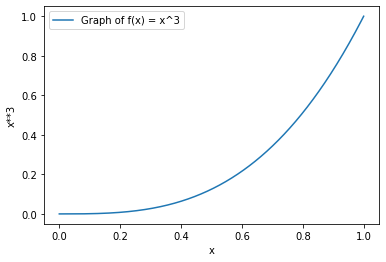

In [ ]:
grid_size = 1000
x_grid = np.linspace(start = 0,stop =1,num=grid_size)
f_vals = x_grid**3
plt.plot(x_grid,f_vals,label="Graph of f(x) = x^3")
plt.xlabel('x')
plt.ylabel('x**3')
plt.legend()
plt.show

Let's do f(x) first. We'll use both random sampling and antithetic sampling and see how many times it takes to stabilize the result.

In [ ]:
def f_area_random(num_trials):
    count =0
    for i in range(num_trials):
        x = random.random()
        count+= x**3 >= random.random()
    return count/num_trials

n = 10000
num_trials = 100
value_list = [f_area_random(num_trials) for _ in range(n)]
print(f"Approx. Area:\t{np.mean(value_list):.2f}")
print(f"Variance: {np.var(value_list):.4f}")

def f_area_antithetic(num_trials):
    count = 0
    for i in range(num_trials//2):
        x = random.random()
        antithetic = 1-x
        count+= x**3 >= random.random()
        count+= antithetic**3 >= random.random()
    return count/num_trials

value_list = [f_area_antithetic(num_trials) for _ in range(n)]
print(f"Approx. Area:\t{np.mean(value_list):.2f}")
print(f"Variance: {np.var(value_list):.4f}")

Approx. Area:	0.25
Variance: 0.0019
Approx. Area:	0.25
Variance: 0.0013


As you can see the antithetic sampling greatly reduces the variance of the simulations and gets us to the answer faster.

<function matplotlib.pyplot.show>

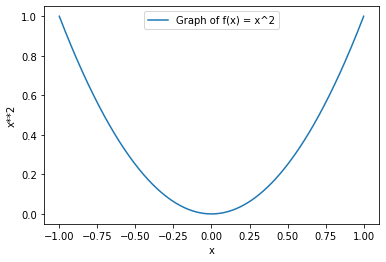

In [ ]:
grid_size = 1000
x_grid = np.linspace(start = -1,stop =1,num=grid_size)
g_vals = x_grid**2
plt.plot(x_grid,g_vals,label="Graph of f(x) = x^2")
plt.xlabel('x')
plt.ylabel('x**2')
plt.legend()
plt.show

In [6]:
def g_area_random(num_trials):
    count = 0
    for i in range(num_trials):
        x = random.random()*2-1
        if x**2 >= random.random():
            count += 1
    return count/num_trials*2

n = 10000
num_trials = 100
value_list = [g_area_random(num_trials) for _ in range(n)]
print(f"Approx. Area:\t{np.mean(value_list):.2f}")
print(f"Variance: {np.var(value_list):.4f}")


def g_area_antithetic(num_trials):
    count = 0
    for i in range(num_trials//2):
        x = random.random()*2-1
        antithetic = -x
        if x**2 >= random.random():
            count += 1
        if antithetic**2 >= random.random():
            count += 1
    return 2*count/num_trials

value_list = [g_area_antithetic(num_trials) for _ in range(n)]
print(f"Approx. Area:\t{np.mean(value_list):.2f}")
print(f"Variance: {np.var(value_list):.4f}")


Approx. Area:	0.67
Variance: 0.0090
Approx. Area:	0.67
Variance: 0.0123


As you can see in this example, the antithetic does not actually improve our variance. In fact it makes it worse. In general, Antithetic sampling works really well for unbalanced or assymmetric functions. It is one of the simpler ways of addressing imbalance in a sampling distribution.

# Weighted Sampling
What if you need to generate a probability that isn't easily sampled from? A lot of more complex and meaningful problems will involve probabilities that are dependent on other events happening. In these cases, it is relatively difficult to calculate and draw from the actual probability without doing a lot of math or using a markov chain. The purpose of this class is to skip the math and use the computer to our advantage.

## Example: False positive rates

A great application of weighted sampling is when dealing wiht conditional probabilities. Bayes Rule is often confusing and unintuitive. Let's walk through a simple problem.

Let's say that the prevalent rate for a disease is 0.1/%

A company has developed a test with a sensitivity(true positive rate) of 100/%, and specificity (true negative rate) of 99.8/%.
This means the probability that if you have the disease, your test will come back positive is 100/%; however, if you don't have the disease, there is a 0.02/% chance that you will receive a positive result. If you receive a positive result, what is the probability that you hav ethe disease? What if the specificity is only 95/%

The traditional statistical approach would be to use the bayes theorem; 

$\begin{align*}
P(disease|pos) &= P(pos|disease)P(disease)/P(pos) \\
P(disease|pos) &= P(pos|disease)P(disease)/(P(pos|disease)P(disease) +P(pos|not disease)P(not disease)) \\
&=(1*0.001)/(1*0.001+0.002*0.999)\\
&= 0.\overline{3}
\end{align*}$

We can think of this as 100000 people are in a population and get tested. 100 get the disease and tests positive. Of the 99900 remaining, all get negative results except for 0.002%. That makes about 200 of them. So 200/300=66.66% of positive test results are false.

however, we can use the weighted approach. Let's make a table to list our probabilities

|event|prob|
|---|---|
|Disease|0.001|
|Pos if Diseased|1|
|Pos if not Diseased | 0 |
|Neg if diseased |0.002|
|Neg if not diseased|0.998|


In [28]:
disease_prob = 0.001
true_prob = 1
neg_prob = 0.998
num_trials = 100000

count_disease = 0
count_false = 0
for _ in range(num_trials):
    disease = random.random() < disease_prob
    count_disease += disease
    if not disease:
        count_false += 0 if random.random()<neg_prob else 1
total_pos = count_disease + count_false
print(f"False positive rate is {count_false/total_pos: 0.04%}")
    

104
220
False positive rate is  67.9012%


Let's say that if a person tests positive the first time, they are required to retake the test a second time. How does this change the false negative rate?

# Warning: Math
Let's first look at the equation for weighted sampling:

$E[f(x)]≈ \frac{1}{n} \displaystyle\sum_{i=1}^n w_i f(x_i)$

Notice that when $w_i = \frac{p(x_i)}{q(x_i)}$ it is the same as importance sampling. In this case we have an unbiased sampling. However, when $w_i$ is different the sampling might be biased. In this case we should divide through by the sum of the weights.

$E[f(x)]≈ \frac{1}{n} \frac{\displaystyle\sum_{i=1}^n w_i f(x_i)}{\displaystyle\sum_{i=1}^{n} w_i}$

One nice thing to notice is that the chosen weights just need to be proportional to the actual weights. If for some reason the chosen weights are off by a factor of 2 it has no effect:

$\frac{1}{n} \frac{\displaystyle\sum_{i=1}^n 2w_i f(x_i)}{\displaystyle\sum_{i=1}^{n} 2w_i}=\frac{1}{n} \frac{\displaystyle\sum_{i=1}^n w_i f(x_i)}{\displaystyle\sum_{i=1}^{n} w_i}$

It turns out that weighted sampling is also used in polling for elections. If we go back to our stratified sampling example:

| District | Population   |  Percent Yes |
|------|------|------|
|   A  | 50%| 19% |
|   B  | 40%| 42% |
|   C  | 10%| 91% |

We were specifically targeting a certain number of voters from each district to preserve the population distribution accros the districts. However, we can aproach this differently by using weighted sampling. Instead, we allow anyone to respond to the poll, but we will adjust the weight of their response based on the expected proportions vs the actual proportions.

In [ ]:
dist_pops = {"A": 0.5, "B": 0.4, "C": 0.1}
yes_dist = {"A": 0.19, "B": 0.42, "C": 0.91}

def poll_simple(num_samples):
  yes_votes = 0
  for _ in range(num_samples):
    rand_district = random.choices(list(dist_pops.keys()), weights=list(dist_pops.values()))[0]
    yes_votes += random.random() < yes_dist[rand_district]
  return yes_votes / num_samples
  
def poll_stratified(num_samples):
  yes_votes = 0
  for district in dist_pops.keys():
    for _ in range(round(dist_pops[district] * num_samples)):
      yes_votes += random.random() < yes_dist[district]
  return yes_votes / num_samples
  
def poll_weighted(num_samples):
  district_counts = {"A":0, "B":0, "C":0}
  votes = []
  for _ in range(num_samples):
    rand_district = random.choices(list(dist_pops.keys()), weights=list(dist_pops.values()))[0]
    district_counts[rand_district] += 1
    votes.append((rand_district, random.random() < yes_dist[rand_district]))
  return sum([v[1] * dist_pops[v[0]]/(district_counts[v[0]]/num_samples) for v in votes])/num_samples

def poll_weighted_uniform(num_samples):
  district_counts = {"A":0, "B":0, "C":0}
  votes = []
  for _ in range(num_samples):
    rand_district = random.choice(list(dist_pops.keys()))
    district_counts[rand_district] += 1
    votes.append((rand_district, random.random() < yes_dist[rand_district]))
  return sum([v[1] * dist_pops[v[0]]/(district_counts[v[0]]/num_samples) for v in votes])/num_samples

def poll_uniform(num_samples):
  yes_votes = 0
  for _ in range(num_samples):
    rand_district = random.choice(list(dist_pops.keys()))
    yes_votes += random.random() < yes_dist[rand_district]
  return yes_votes / num_samples

trials = 10000
samples = 50
value_list = [poll_simple(samples) for _ in range(trials)]
print(f"Estimated Vote:\t{np.mean(value_list):.2f}")
print(f"Variance: {np.var(value_list):.4f}")


value_list = [poll_stratified(samples) for _ in range(trials)]
print(f"Estimated Vote:\t{np.mean(value_list):.2f}")
print(f"Variance: {np.var(value_list):.4f}")

value_list = [poll_weighted(samples) for _ in range(trials)]
print(f"Estimated Vote:\t{np.mean(value_list):.2f}")
print(f"Variance: {np.var(value_list):.4f}")

value_list = [poll_weighted_uniform(samples) for _ in range(trials)]
print(f"Estimated Vote:\t{np.mean(value_list):.2f}")
print(f"Variance: {np.var(value_list):.4f}")

value_list = [poll_uniform(samples) for _ in range(trials)]
print(f"Estimated Vote:\t{np.mean(value_list):.2f}")
print(f"Variance: {np.var(value_list):.4f}")

Estimated Vote:	0.35
Variance: 0.0044
Estimated Vote:	0.35
Variance: 0.0037
Estimated Vote:	0.35
Variance: 0.0038
Estimated Vote:	0.35
Variance: 0.0049
Estimated Vote:	0.51
Variance: 0.0051


# Importance Sampling
Importance Sampling is a general technique for estimating properties of a particular distribution, while only having samples generated from a different distribution than the distribution of interest. This is useful when the actual distribution is either unknown or is hard to sample from.

The idea of the method is to choose a distribution that encourages the important values. This means that we have a basic understanding of how our solution should look and we intend to take a biased sample that will represent that. Since this technique comes from physics it gets a bit more mathematical here. We will use the example of the election and move on to a more rigorous definition. 

## Example: Election
Suppose that we are once again working on the election and want to estimate the town. We feel that the customers at the local diner have a good representation for the type of people we want to interview so we decide to post up there and poll them on their preferred candidate. Here we are using an unrelated sample to emphasize the important observations for our survey.



## Math behind it all

Now to get in the math of things. We have our equation for expected value

$E[f(x)] = \int f(x)p(x) dx \approx \frac{1}{n}\sum_i f(x_i)$

In Monte Carlo methods, we sample our random value with the probabilities p(x). This means in the long run the proportion of the values for the function f(x) should be equal to p(x). **Remember** The expected value is just a weighted average: found by summing up the product of the observations for f and p.

Let's say that we cannot program p(x) accurately. Maybe it's not a known distribution or maybe it's just realy hard to sample. When this is the case, one would call the sampling method biased. What we do is a little bit of mathematical magic to manipulate the equation. We take another distribution q(x) and divide 

let p(x) be the desired distribution, q(x) is the biased distribution from which we wish to sample. That is, we want to sample from p(x), but we're only able to sample from q(x).

$\frac{p(x)}{q(x)}$ is called the sampling ratio or sampling weight.

$E[f(x)] = \int f(x)p(x)dx  \int f(x)\frac{p(x)}{q(x)}dx \approx \frac{1}{n}\sum_i f(x_i)\frac{p(x)}{q(x)}$

where instead of p(x), x is sampled from q(x) and $q(x)\neq 0 $. This way we can estimate the expectation and we are able to sample from another distribution.

 This acts as the correction weight to offset the fact that we're biasing our estimate towards a different distribution. If you would like to do a formal caclulation of variance $Var(Y) = E[Y^2] - E[Y]^2$ The variance is the expecteed value of the square minus the square of the expected value. We can see that the variance is directly proportional to $\frac{p(x)}{q(x)}$ so you should want to minimize its value. This means that you should aim to make q(x) as similar as possible to p(x).

Let's walk through an example courtesy of: https://towardsdatascience.com/importance-sampling-introduction-e76b2c32e744

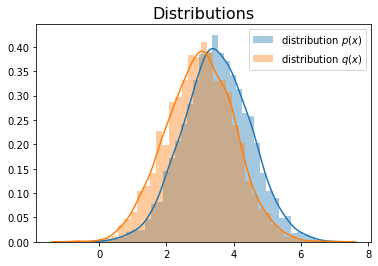

In [ ]:
def f_x(x):
    return 1/(1 + np.exp(-x))
def distribution(mu=0, sigma=1):
    # return probability given a value
    distribution = stats.norm(mu, sigma)
    return distribution
    
# pre-setting
n = 1000

mu_target = 3.5
sigma_target = 1
mu_appro = 3
sigma_appro = 1
p_x = distribution(mu_target, sigma_target)
q_x = distribution(mu_appro, sigma_appro)

sns.distplot([np.random.normal(mu_target, sigma_target) for _ in range(3000)], label="distribution $p(x)$")
sns.distplot([np.random.normal(mu_appro, sigma_appro) for _ in range(3000)], label="distribution $q(x)$")
plt.title("Distributions", size=16)
plt.legend()
plt.show()

In [ ]:
value_list =[]
for i in range(n):
    x_i = np.random.normal(mu_target,sigma_target)
    value = f_x(x_i)
    value_list.append(value)
print(f"Estimated value {np.mean(value_list):0.2f}.\nVariance {np.var(value_list):0.2f}")

Estimated value 0.95.
Variance 0.00


Above we calculated the actual value of E[f(x)]. Not bad. Remember, the integral of a distribution should always be 1. This is the result if we just do it like normal. 


Below, we will now use the importance sampling to see how it performs. and compares

In [ ]:
value_list = []
for i in range(n):
    # sample from different distribution
    x_i = np.random.normal(mu_appro, sigma_appro)
    value = f_x(x_i)*(p_x.pdf(x_i) / q_x.pdf(x_i))
    value_list.append(value)
print(f"Estimated value {np.mean(value_list):0.2f}.\nVariance {np.var(value_list):0.2f}")

Estimated value 0.95.
Variance 0.28


Now let's use a different distribution to estimate. LEt's say we use a similar 

---

one but still further off. 

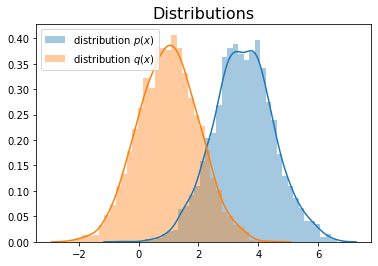

In [ ]:
# pre-setting
n = 5000

mu_target = 3.5
sigma_target = 1
mu_appro = 1
sigma_appro = 1

p_x = distribution(mu_target, sigma_target)
q_x = distribution(mu_appro, sigma_appro)

sns.distplot([np.random.normal(mu_target, sigma_target) for _ in range(3000)], label="distribution $p(x)$")
sns.distplot([np.random.normal(mu_appro, sigma_appro) for _ in range(3000)], label="distribution $q(x)$")
plt.title("Distributions", size=16)
plt.legend()
plt.show()

As you can see the values don't overlap much. This is a good example of how different two distributions can be. When we estimate with a uniform sample there is a chance that we are ignoring important values just like the graph above ignores most of the mass of our target.

In [ ]:
value_list = []
for i in range(n):
    # sample from different distribution
    x_i = np.random.normal(mu_appro, sigma_appro)
    value = f_x(x_i)*(p_x.pdf(x_i) / q_x.pdf(x_i))
    value_list.append(value)
print(f"Estimated value {np.mean(value_list)}.\nVariance {np.var(value_list)}")

Estimated value 1.0685006177090244.
Variance 200.67592592003004


I believe this illustrates the power of importance sampling. When  we can estimate an appropriate approximation, we are able to get a much less varied samples.

In [ ]:
[random.choices(list(dist_pops.keys()), weights=list(dist_pops.values()))[0] for _ in range(20)]

['B',
 'A',
 'B',
 'A',
 'A',
 'A',
 'B',
 'A',
 'C',
 'C',
 'A',
 'B',
 'C',
 'B',
 'A',
 'B',
 'A',
 'B',
 'A',
 'C']

In [ ]:
sample=['B',
 'A',
 'B',
 'A',
 'A',
 'A',
 'B',
 'A',
 'C',
 'C',
 'A',
 'B',
 'C',
 'B',
 'A',
 'B',
 'A',
 'B',
 'A',
 'C']

In [ ]:
district_counts = {"A":0, "B":0, "C":0}
for district in sample:
  district_counts[district] += 1/20
district_counts

{'A': 0.44999999999999996, 'B': 0.35, 'C': 0.2}

In [ ]:
#f(x) * p(x) / q(x)
1 * 0.5 / 0.45

1.1111111111111112

In [ ]:
#f(x) * p(x) / q(x)
(random.random() < 0.91) * 0.1 / 0.2

0.5